/tmp/ipykernel_60/2593303344.py:17: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  circ.cu1(c-a, q[n_ancilla-k], q[n_ancilla+n])
/tmp/ipykernel_60/2593303344.py:18: DeprecationWarning: The QuantumCircuit.u1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.p method instead, which acts identically.
  circ.u1(a,q[n_ancilla-k])
/tmp/ipykernel_60/2593303344.py:19: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  circ.cu1(b-a, q[n_ancilla-k], q[n_ancilla+n+1])
/tmp/ipykernel_60/2593303344.py:21: DeprecationWarning: The QuantumCircuit.u1 method is deprecated 

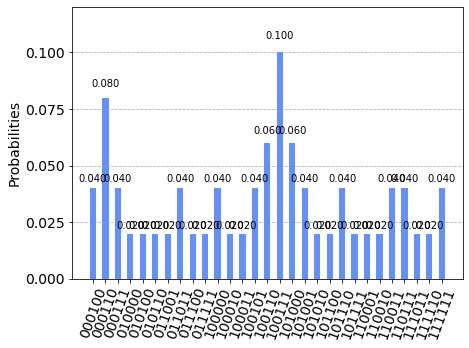

In [4]:
#initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

def controlled_U(circ,a,b,c,d,n,k):
    """this is corresponding to the C-U_j in equation (8) """
    circ.cu1(c-a, q[n_ancilla-k], q[n_ancilla+n])
    circ.u1(a,q[n_ancilla-k])
    circ.cu1(b-a, q[n_ancilla-k], q[n_ancilla+n+1])
    circ.ccx(q[n_ancilla-k], q[n_ancilla+n], q[n_ancilla+n+1])
    circ.u1(d+c-b-a,q[n_ancilla+n+1])
    circ.ccx(q[n_ancilla-k], q[n_ancilla+n], q[n_ancilla+n+1])

def qft_dagger(circ, q, n):
    """n-qubit QFTdagger on q in circ."""
    for j in range(n):
        k = (n-1) - j
        for m in range(k):
            circ.cu1(-math.pi/float(2**(k-m)), q[k], q[m])
        circ.h(q[k])

n_ancilla = 6
n_eigenvector = 8
q = QuantumRegister(n_ancilla+n_eigenvector, 'q')
c = ClassicalRegister(n_ancilla, 'c')
qpe = QuantumCircuit(q, c)
qpe.x(q[n_ancilla])
qpe.x(q[n_ancilla+1])
qpe.x(q[n_ancilla+5])
qpe.x(q[n_ancilla+6])
for i in range(n_ancilla):
    qpe.h(q[i])
qpe.barrier()
controlled_U(qpe,0,math.pi/2,math.pi/8,math.pi/4,0,1)
controlled_U(qpe,math.pi/2,0,math.pi/4,math.pi/4,2,1)
controlled_U(qpe,math.pi/8,math.pi/4,0,math.pi/8,4,1)
controlled_U(qpe,math.pi/4,math.pi/4,math.pi/8,0,6,1)
qpe.barrier()
for i in range(2):
    controlled_U(qpe,0,math.pi/2,math.pi/8,math.pi/4,0,2)
    controlled_U(qpe,math.pi/2,0,math.pi/4,math.pi/4,2,2)
    controlled_U(qpe,math.pi/8,math.pi/4,0,math.pi/8,4,2)
    controlled_U(qpe,math.pi/4,math.pi/4,math.pi/8,0,6,2)
qpe.barrier()
for i in range(4):
    controlled_U(qpe,0,math.pi/2,math.pi/8,math.pi/4,0,3)
    controlled_U(qpe,math.pi/2,0,math.pi/4,math.pi/4,2,3)
    controlled_U(qpe,math.pi/8,math.pi/4,0,math.pi/8,4,3)
    controlled_U(qpe,math.pi/4,math.pi/4,math.pi/8,0,6,3)
qpe.barrier()
for i in range(8):
    controlled_U(qpe,0,math.pi/2,math.pi/8,math.pi/4,0,4)
    controlled_U(qpe,math.pi/2,0,math.pi/4,math.pi/4,2,4)
    controlled_U(qpe,math.pi/8,math.pi/4,0,math.pi/8,4,4)
    controlled_U(qpe,math.pi/4,math.pi/4,math.pi/8,0,6,4)
qpe.barrier()
for i in range(16):
    controlled_U(qpe,0,math.pi/2,math.pi/8,math.pi/4,0,5)
    controlled_U(qpe,math.pi/2,0,math.pi/4,math.pi/4,2,5)
    controlled_U(qpe,math.pi/8,math.pi/4,0,math.pi/8,4,5)
    controlled_U(qpe,math.pi/4,math.pi/4,math.pi/8,0,6,5)
qpe.barrier()
for i in range(32):
    controlled_U(qpe,0,math.pi/2,math.pi/8,math.pi/4,0,6)
    controlled_U(qpe,math.pi/2,0,math.pi/4,math.pi/4,2,6)
    controlled_U(qpe,math.pi/8,math.pi/4,0,math.pi/8,4,6)
    controlled_U(qpe,math.pi/4,math.pi/4,math.pi/8,0,6,6)
qpe.barrier()

qft_dagger(qpe,q,6)
qpe.barrier()
for i in range(n_ancilla):
    qpe.measure(q[i],c[i])

backend = BasicAer.get_backend('qasm_simulator')
shots = 50
results = execute(qpe, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)
